In [1]:
import socket

In [2]:
socket.gethostname()

'salish.eos.ubc.ca'

In [3]:
import pandas as pd
import netCDF4 as nc
import datetime as dt
import subprocess
import requests
import matplotlib.pyplot as plt
import cmocean
import numpy as np
import os
import re
import dateutil as dutil
from salishsea_tools import viz_tools, places, geo_tools, evaltools as et
import glob
import pickle
import matplotlib.dates as mdates
import matplotlib as mpl
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=16) 
mpl.rc('legend', fontsize=16) 
mpl.rc('axes', titlesize=16) 
mpl.rc('figure', titlesize=16) 
mpl.rc('axes', labelsize=16) 
mpl.rc('font', size=16) 

mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['legend.numpoints'] = 1
%matplotlib inline

search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20140804T234330Z_20150604T070614Z-clean.csv
search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20150604T070624Z_20160307T160206Z-clean.csv
search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20160307T160215Z_20161019T064047Z-clean.csv
search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20161019T064056Z_20161115T220747Z-clean.csv
search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170217T003041Z_20170315T031911Z-clean.csv
search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170315T031912Z_20170404T195130Z-clean.csv
search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170404T195131Z_20170426T173215Z-clean.csv
search4979680/BritishColumb

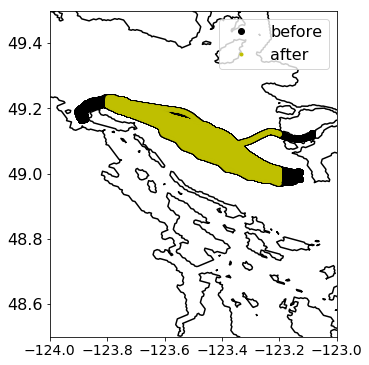

In [4]:
flist=['search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20140804T234330Z_20150604T070614Z-clean.csv',
       'search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20150604T070624Z_20160307T160206Z-clean.csv',
       'search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20160307T160215Z_20161019T064047Z-clean.csv',
       'search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20161019T064056Z_20161115T220747Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170217T003041Z_20170315T031911Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170315T031912Z_20170404T195130Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170404T195131Z_20170426T173215Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170426T173216Z_20170522T011843Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170522T011844Z_20170611T234016Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170611T234017Z_20170702T172228Z-clean.csv']
slist=[78,78,78,78,67,67,67,67,67,67]
dfs=list()
for ii in range(0,len(flist)):
    print(flist[ii])
    dfs.append(pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/'+flist[ii],
        skiprows=slist[ii],header=None,usecols=[0,1,2,3,4,5,6,7,8,9,10],
        names=('TimeUTC','CDOM','CDOMQC','Chlorophyll_ug','ChlQC','Turbidity_NTU','TurbQC','Lat','LatQC','Lon','LongQC'),na_values=' NaN'))

df=pd.concat(dfs,ignore_index=True)
df.drop(df[df.ChlQC != 1].index, inplace=True)
dts=[dt.datetime(int(r[0:4]),int(r[5:7]),int(r[8:10]),int(r[11:13]),int(r[14:16]),int(r[17:19])) for r in df['TimeUTC']]
df=df.assign(dtUTC=dts)
df['Lat']=pd.to_numeric(df['Lat'],errors='coerce')
df['Lon']=pd.to_numeric(df['Lon'],errors='coerce')
df.drop(df[(df.Lat != df.Lat)|(df.Lon != df.Lon)].index, inplace=True)
print('totlen=',len(df))

# chop off ends:
fig, ax = plt.subplots(figsize = (6,6))
viz_tools.set_aspect(ax, coords = 'map')
#ax.plot(df['Lon'],df['Lat'], 'ro',label='data')
ax.plot(df['Lon'],df['Lat'], 'ko',label='before')
df.drop(df.loc[(df.Lon<-123.8)|(df.Lon>-123.2)].index,inplace=True)
df.reset_index(inplace=True)
ax.plot(df['Lon'],df['Lat'],'y.',label='after')
#ax.plot(df2.loc[60,['Lon']],df2.loc[60,['Lat']],'m.')
with nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc') as grid:
    viz_tools.plot_coastline(ax, grid, coords = 'map')
ax.set_ylim(48.5, 49.5)
ax.legend()
ax.set_xlim(-124., -123);

In [5]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as fm:
    tmask=np.copy(fm.variables['tmask'])
    umask=np.copy(fm.variables['umask'])
    vmask=np.copy(fm.variables['vmask'])
    navlon=np.copy(fm.variables['nav_lon'])
    navlat=np.copy(fm.variables['nav_lat'])
    e3t_0=np.copy(fm.variables['e3t_0'])
    e3u_0=np.copy(fm.variables['e3u_0'])
    e3v_0=np.copy(fm.variables['e3v_0'])
    e1t=np.copy(fm.variables['e1t'])
    e2t=np.copy(fm.variables['e2t'])
    e1v=np.copy(fm.variables['e1v'])
    e2u=np.copy(fm.variables['e2u'])
    A=fm.variables['e1t'][0,:,:]*fm.variables['e2t'][0,:,:]*tmask[0,0,:,:]
    lmask=-1*(tmask[0,0,:,:]-1)

In [6]:
def nearestGridArray1(lons,lats):
    outi=np.nan*np.ones(np.shape(lons))
    outj=np.nan*np.ones(np.shape(lons))
    for kk in range(0,len(lons)):
        outj[kk],outi[kk]=geo_tools.find_closest_model_point(lons[kk],lats[kk],navlon,navlat,land_mask=lmask)
    return outj, outi

In [7]:
import xarray as xr
from moad_tools.geo_tools import estimate_closest_point
#def estimate_closest_point(dataset, lons, lats):
#    """Estimate the closest grid point to an array of lat/lons
#    using a index file created by make_mapping_file above

#    :param xarray dataset: dataset

#    :param numpy array or list: lons

#    :param numpy array or list: lats

#    return: numpy array of indexes: iis, jjs
#    """
#    indexi, indexj = np.array(dataset['indexi']), np.array(dataset['indexj'])
#    lonmin, latmin = dataset['lonmin'].values, dataset['latmin'].values
#    dlon, dlat = dataset['dlon'].values, dataset['dlat'].values
#    iis = indexi[(np.round((lons-lonmin)/dlon)).astype(int),
#              (np.round((lats-latmin)/dlat)).astype(int)]
#    jjs = indexj[(np.round((lons-lonmin)/dlon)).astype(int),
#              (np.round((lats-latmin)/dlat)).astype(int)]
#    return (iis, jjs)

In [8]:
def nearestGridArray3(lons,lats):
    dataset = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/SalishSea2_mapping.nc')
    outi,outj=estimate_closest_point(dataset,lons,lats)
    return outj, outi

In [9]:
def nearestGridArray2(lons,lats):
    outj,outi=geo_tools.closestPointArray(lons,lats,navlon,navlat,land_mask=lmask)
    return outj, outi

In [10]:
mj,mi=np.shape(lmask)
mj,mi

(898, 398)

In [11]:
lo=df['Lon'].values[:5000]
la=df['Lat'].values[:5000]

In [12]:
%%timeit
lons1,lats1=nearestGridArray1(lo,la)
#4.78 s ± 25.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

8.8 s ± 214 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%%timeit
lons2,lats2=nearestGridArray2(lo,la)
#229 ms ± 3.38 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

577 ms ± 2.89 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
%%timeit
lons2,lats2=nearestGridArray3(lo,la)

213 ms ± 2.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
j1,i1=nearestGridArray1(lo,la)
j2,i2=nearestGridArray2(lo,la)
j3,i3=nearestGridArray3(lo,la)

In [17]:
np.max(np.abs(j2-j1)),np.max(np.abs(i2-i1))

(0.0, 0.0)

In [18]:
np.max(np.abs(j3-j1)),np.max(np.abs(i3-i1))

(187.0, 94.0)

In [19]:
np.where(j3-j1==-197)

(array([], dtype=int64),)

In [20]:
lo[68],la[68]

(-123.79944878, 49.217392683)

In [21]:
j3[68],i3[68]

(298, 288)

In [22]:
j1[68],i1[68]

(485.0, 234.0)

In [23]:
navlon[288, 298],navlon[485, 234]

(-122.80654, -123.79926)

In [24]:
navlat[288, 298],navlat[485, 234]

(48.56524, 49.219734)

In [25]:
dataset = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/SalishSea2_mapping.nc')

In [26]:
estimate_closest_point(dataset,-123.79944878, 49.217392683)

(288, 298)

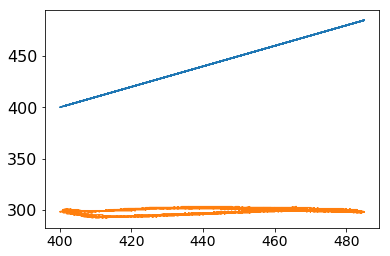

In [27]:
plt.plot(j1,j2)
plt.plot(j1,j3)

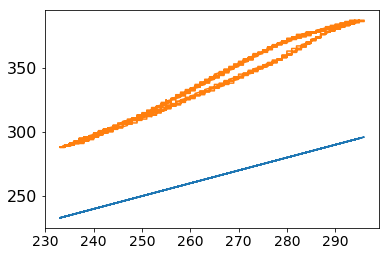

In [28]:
plt.plot(i1,i2)
plt.plot(i1,i3)